## **ALGORITMOS DE SEGMENTACION**

#### Omar Urena

In [ ]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

### Get Data

In [ ]:
# get data and show some records

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


#data = data.drop('Id', axis=1) # get rid of the Id column - don't need it
data.sample(5)

,sepal length,sepal width,petal length,petal width,target
109,7.2,3.6,6.1,2.5,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
67,5.8,2.7,4.1,1.0,Iris-versicolor
20,5.4,3.4,1.7,0.2,Iris-setosa
68,6.2,2.2,4.5,1.5,Iris-versicolor


In [ ]:
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]

print("\n Caracteristicas \n")
print(X.sample(5))
print("\n Target \n")
print(y.sample(5))


 Caracteristicas 

     sepal length  sepal width  petal length  petal width
97            6.2          2.9           4.3          1.3
20            5.4          3.4           1.7          0.2
131           7.9          3.8           6.4          2.0
113           5.7          2.5           5.0          2.0
95            5.7          3.0           4.2          1.2

 Target 

81     Iris-versicolor
140     Iris-virginica
54     Iris-versicolor
90     Iris-versicolor
111     Iris-virginica
Name: target, dtype: object


### Visualize Data

In [ ]:

data["target"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

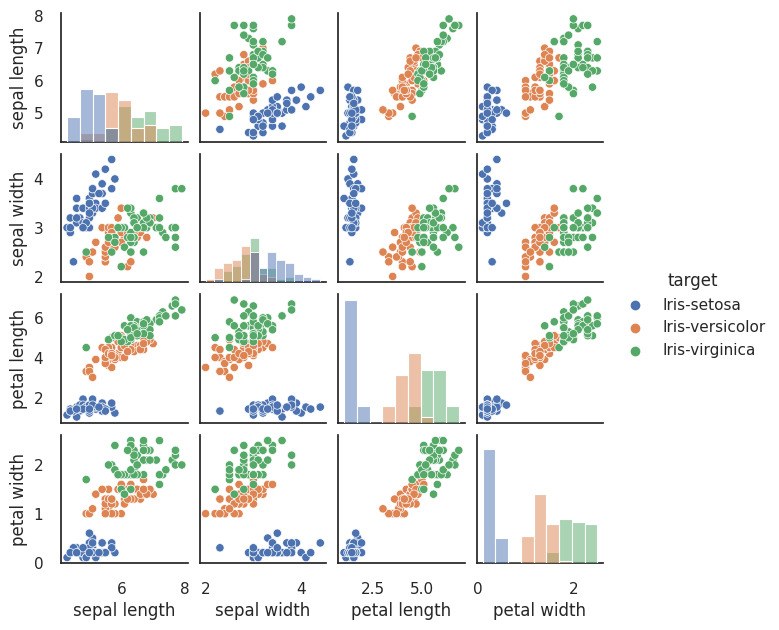

In [ ]:


sns.pairplot(data, hue="target", diag_kind="hist", size=1.6);

Versicolor y Virginica son muy similares, sera muy dificil generar un algoritmo de clustering que las pueda separar, pero vamos a intentarlo!!

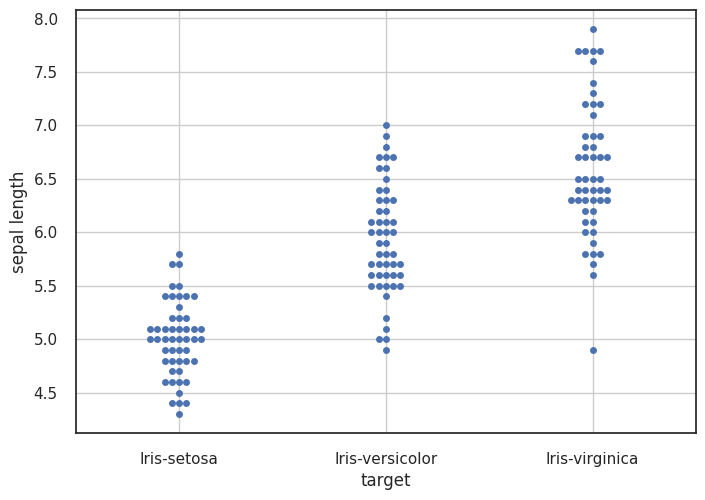

In [ ]:
sns.swarmplot(x="target", y="sepal length", data=data)
plt.grid()


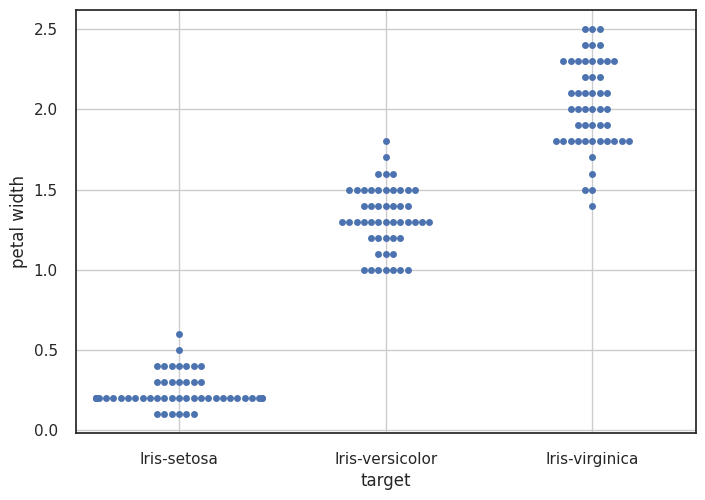

In [ ]:
sns.swarmplot(x="target", y="petal width", data=data)
plt.grid()

### Feature Scaling

Los datos estan desbalanceados por ejemplo Sepal Lenght es aproximadamente 4 veces mas grande que Petal Width,
por lo tando recomiendo escalar los valores.
de lo contrario, las características más grandes dominarán a las demás en la agrupación, etc.

In [ ]:

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()


X_scaled_array = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(10)

,sepal length,sepal width,petal length,petal width
76,1.159173,-0.587764,0.592162,0.264699
144,1.038005,0.569251,1.103953,1.710902
79,-0.173674,-1.050569,-0.147093,-0.261193
77,1.038005,-0.124958,0.705893,0.659118
136,0.553333,0.800654,1.047087,1.579429
3,-1.506521,0.106445,-1.284407,-1.312977
128,0.674501,-0.587764,1.047087,1.185010
135,2.249683,-0.124958,1.331416,1.447956
115,0.674501,0.337848,0.876490,1.447956
55,-0.173674,-0.587764,0.421564,0.133226


### Silhouette score & Elbow Method

un valor cercano a +1 indica que la muestra está lejos de los conglomerados vecinos. Un valor de 0 indica que la muestra se encuentra en el límite de decisión entre dos conglomerados vecinos o muy cerca del mismo, y los valores negativos indican que es posible que esas muestras se hayan asignado al conglomerado equivocado.

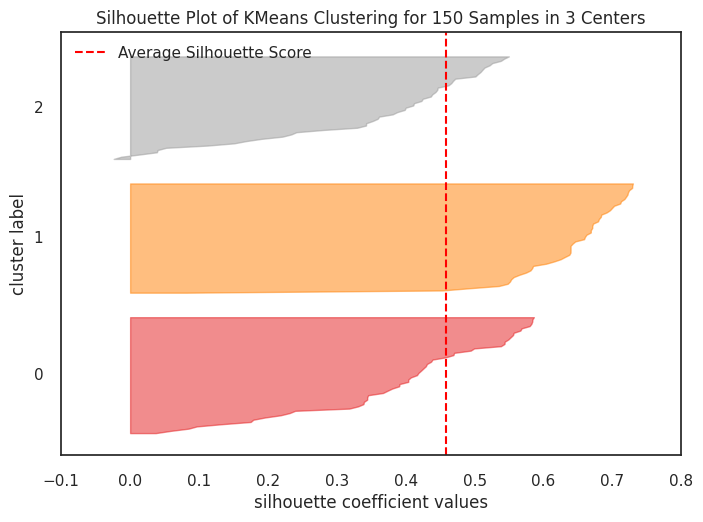

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

nclusters = 3
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data


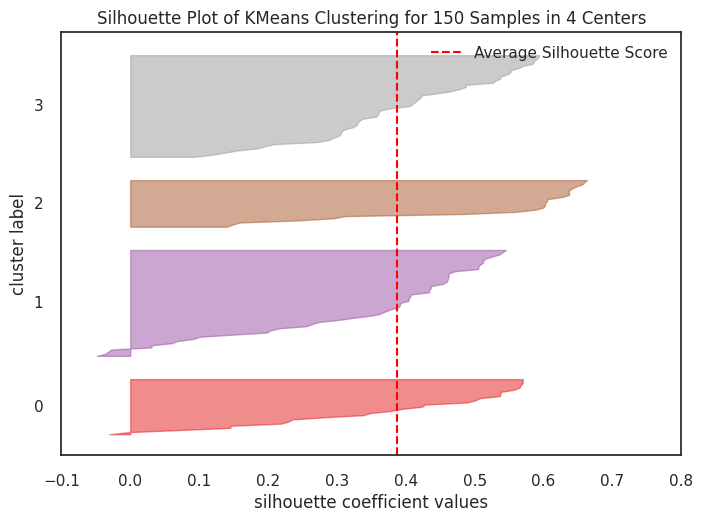

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

nclusters = 4
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data


Se puede observar que con 3 cluster se obtiene un promedio de score de silueta de 0,47 y con 4 clusters un score de 0,39 aproximadamente, por lo tanto se recomienda entrenar un modelo de clustering con 3 clusters

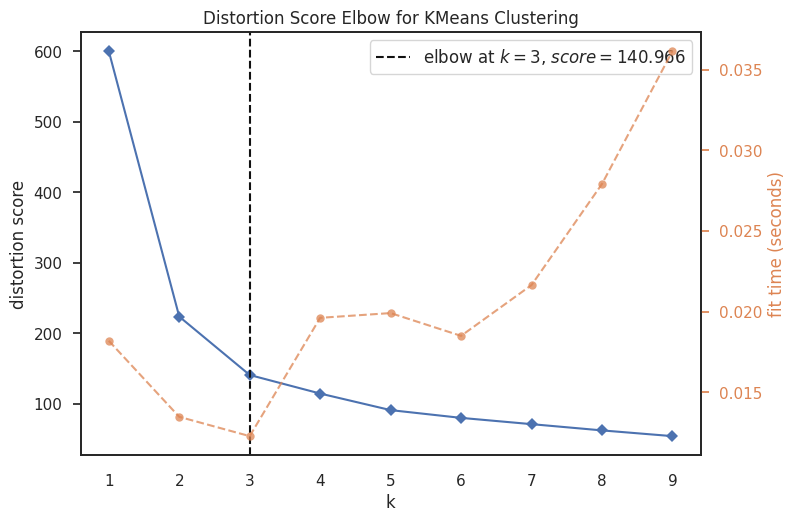

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer

seed = 0

km = KMeans(init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = KElbowVisualizer(km, k=(1,10))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure

Observamos por el metodo de ELBOW que tenemos que utilizar un K=3 es decir 3 clusters.

### K-Means

Intente agrupar los datos en 4D y ver si puede reproducir los clústeres reales. Es decir, imagine que no tenemos las etiquetas de especies en estos datos y queremos dividir las flores en especies. podría establecer un número arbitrario de grupos
e intentar dividirlos en grupos similares. Sabemos que hay 3 especies, así que encontremos 3 especies y veamos
si las predicciones para cada punto coinciden con la etiqueta en y, por otro lado sabemos que por el metodo de las siluetas y elbow, la cantidad de clusters recomendada es 3

In [ ]:

from sklearn.cluster import KMeans

nclusters = 3
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

y_cluster_kmeans = km.predict(X_scaled)

print("\n Caracteristicas \n")
print(X_scaled)

print("\n\n\n Clusters \n")
print(y_cluster_kmeans)


 Caracteristicas 

     sepal length  sepal width  petal length  petal width
0       -0.900681     1.032057     -1.341272    -1.312977
1       -1.143017    -0.124958     -1.341272    -1.312977
2       -1.385353     0.337848     -1.398138    -1.312977
3       -1.506521     0.106445     -1.284407    -1.312977
4       -1.021849     1.263460     -1.341272    -1.312977
..            ...          ...           ...          ...
145      1.038005    -0.124958      0.819624     1.447956
146      0.553333    -1.281972      0.705893     0.922064
147      0.795669    -0.124958      0.819624     1.053537
148      0.432165     0.800654      0.933356     1.447956
149      0.068662    -0.124958      0.762759     0.790591

[150 rows x 4 columns]



 Clusters 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2

### Principal Component Analysis (PCA)


Si tiene muchas característics, puede ser útil reducir algunas características, para evitar la maldición de la dimensionalidad (es decir, necesitar exponencialmente más datos para hacer predicciones precisas a medida que crece la cantidad de características).
Puede hacer esto con el análisis de componentes principales (PCA), que reasigna los datos a un nuevo sistema de coordenadas (más pequeño) que trata de dar cuenta de la mayor información posible. puedes *también* usar PCA para visualizar los datos al reducir las # características a 2 dimensiones y hacer un diagrama de dispersión.

En este caso recomiendo usar PCA para poder visualizar los datos, ya entrenamos el modelo de K-means y tenemos los clusters identificados, ahora transformemos de 4D a 2D las caracteristicas. para solo visualizarlas en un grafico, y poder observar los CLUSTERS.

In [ ]:

from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)


X_pca = pd.DataFrame(X_pca_array, columns=['principal component 1','principal component 2'])


print(X_pca.sample(10))
explained_variance = pca.explained_variance_ratio_
print("\n\n explained_variance")
print(explained_variance)

     principal component 1  principal component 2
47               -2.398192              -0.362391
108               2.001735              -0.723865
26               -2.052063               0.266014
100               1.847673               0.871697
125               1.957728               1.003335
127               1.019781               0.065543
72                1.227988              -0.940915
97                0.573883              -0.153720
129               1.864778               0.555382
6                -2.445711               0.074563


 explained_variance
[0.72770452 0.23030523]


Tenemosnuevas coordenadas 2D para cada punto de datos.
En este punto, si no tiene datos etiquetados, puede agregar los ID de clúster de k-means a esta tabla y hacer un
diagrama de dispersión de colores. en realidad tenemos etiquetas para los puntos de datos, pero imaginemos que
no las tenemos, y usemos las etiquetas pronosticadas para ver cómo se ven las predicciones.



In [ ]:

finalDf = pd.concat([X_pca, data[['target']]], axis = 1)
finalDf.head()

finalDf['ClusterKmeans'] = y_cluster_kmeans
finalDf.sample(10)

,principal component 1,principal component 2,target,ClusterKmeans
90,0.272335,-1.119442,Iris-versicolor,0
140,2.016157,0.610397,Iris-virginica,2
95,0.089053,-0.174909,Iris-versicolor,0
107,2.303006,0.409517,Iris-virginica,2
88,0.067068,-0.212621,Iris-versicolor,0
55,0.384458,-0.591062,Iris-versicolor,0
125,1.957728,1.003335,Iris-virginica,2
20,-1.914556,0.430465,Iris-setosa,1
18,-1.894074,1.431111,Iris-setosa,1
19,-2.339949,1.158033,Iris-setosa,1


### Grafica de Dispersion (TARGET)

En esta grafica visualizaremos todos los puntos, en donde los ejes son los componentes principales obtenidos de aplicar PCA al dataset escalado, y cada punto se visualizara pintado con colores asociados a la etiqueta o target, ya que partimos de un dataset etiquetado.

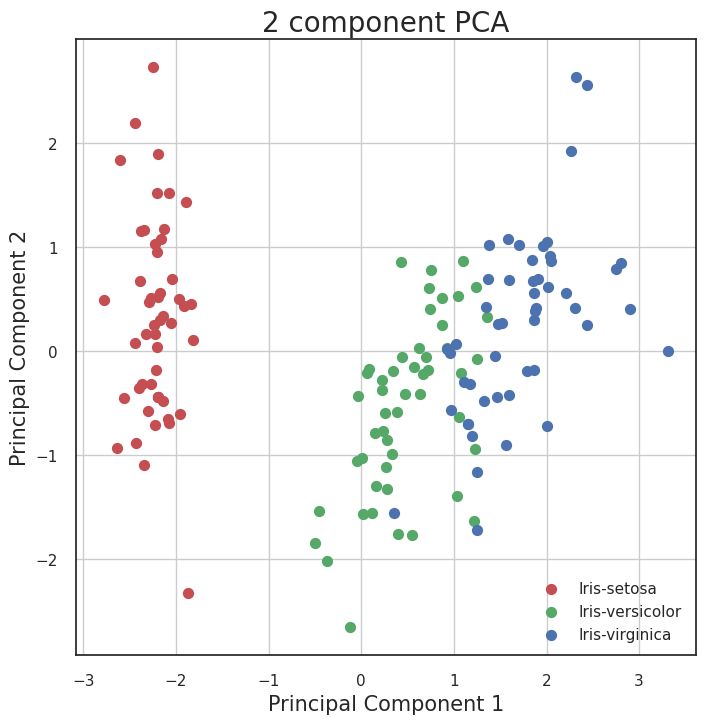

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Grafica de Dispersion (CLUSTERS)

En esta grafica visualizaremos todos los puntos, en donde los ejes son los componentes principales obtenidos de aplicar PCA al dataset escalado, y cada punto se visualizara pintado con colores asociados al CLUSTER obtenido luego de aplicar K-MEANS, como se puede comparar con los datos etiquetados, los clusters se ASEMEJAN BASTANTE.

Un mecanismo asi puede ser utilizado para etiquetar flores, cuando no tenemos la etiqueta de antemano, incluso nos puede servir para generar clasificaciones mas especificas.

Como aclaramos desde el principio, la division entre Versicolor y Virginica es muy fina, y en ambos graficos es costoso encontrar una division clara.

La division real, basada en los datos etiquetados de antemano, es por una linea VERTICAL al medio del conjunto de datos, en cambio segun K-means, la division es por una linea horizontal a traves de los datos.

En estos casos la realidad difiere un poco, de lo que establece un algoritmo matematico. Seguramente para obtener una mejor division sea necesario contar con mas caracteristicas.

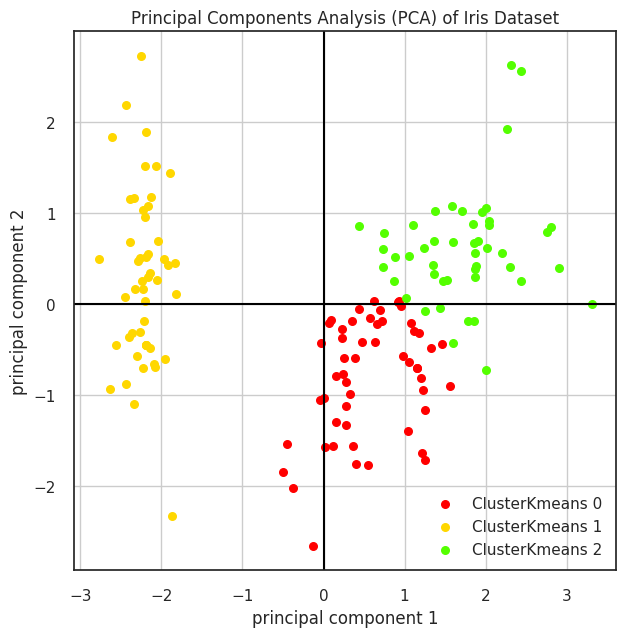

In [ ]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"

    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure,
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter',
                     x = 'principal component 1', y = 'principal component 2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i),
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

# plot the clusters each datapoint was assigned to
plotData(finalDf, 'ClusterKmeans')


#CONCLUSION DEL ANALISIS DESARROLLADO:

En conclusion, podemos observar que el algoritmo casi identifico perfectamente los tres tipos de flores, en comparacion con la clasificacion original, resaltando un punto interesante que muestra este ultimo grafico es que en el caso de la versicolor y virginica el algorimo realizó una segmentacion mas horizontal donde se puede apreciar una clasificacion mas clara a se aprecia en los datos orginales, sin embargo, para la clase Setosa se segmentó perfectamenta.

Visto este analisis podemos darnos en cuenta las importancia de transformar la data, es decir, escalarla para tener un mejor precision del los algoritmo de clustering.

# Anexo

Me resulto curioso comprobar el DBScan y a persar de tener un segmentacion de cluster diferente al original al comparar la muestra, podemos apreciar un coeficiente de 0.501 y 3 cluster en comparacion los primeros de Kmeans que arrojaron resultados con 3 cluster un promedio de score de silueta de 0,47 y con 4 clusters un score de 0,39 aproximadamente, por lo que en una configuracion de los hiperparametros del BDScan podemos mejorar este coeficiente.

Estimated number of clusters: 3
Silhouette Coefficient: 0.501


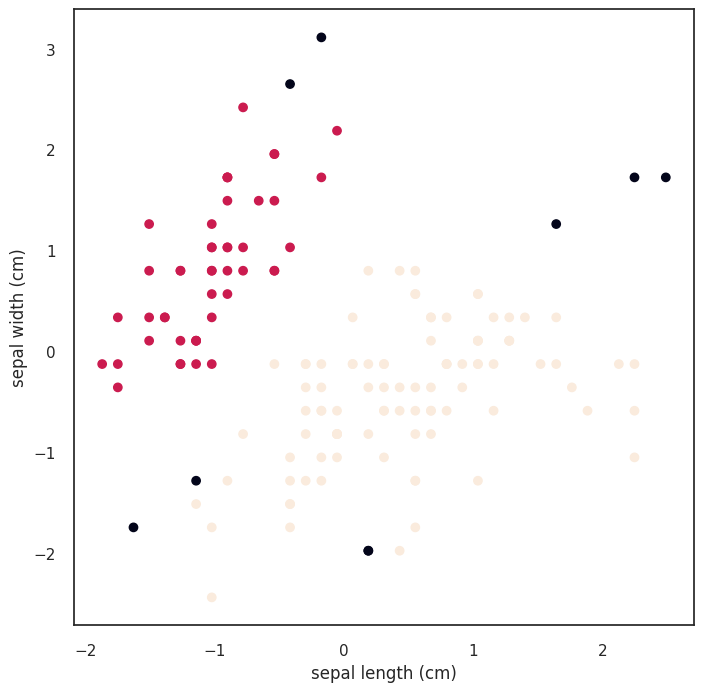

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics


# Escalar características
X_scaled = scaler.fit_transform(data.iloc[:, :-1])

# Aplicar algoritmo DBSCAN

dbscan = DBSCAN(eps= 0.75, min_samples=6)
dbscan.fit(X_scaled)

# Obtener etiquetas de los clusters
labels = dbscan.labels_

# Número de clusters en etiquetas
n_clusters_ = len(set(labels))

# Imprimir métricas de rendimiento
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, labels))

# Visualizar resultados
fig = plt.figure(figsize = (8,8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c =labels)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

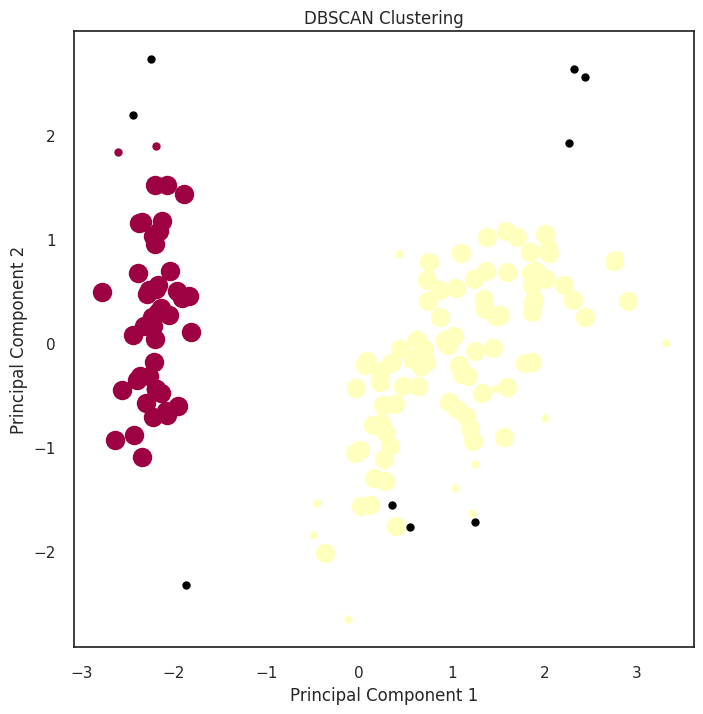

In [ ]:
import matplotlib.pyplot as plt

# Aplicar DBSCAN a X_scaled para obtener los clusters y los puntos núcleo
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.75, min_samples=6)
y_cluster_dbscan = dbscan.fit_predict(X_scaled)
core_samples_mask = np.zeros_like(y_cluster_dbscan, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Obtener las coordenadas de las características escaladas reducidas a 2 dimensiones por PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)
x = X_pca[:, 0]
y = X_pca[:, 1]

# Obtener los diferentes clusters encontrados por DBSCAN
unique_labels = set(y_cluster_dbscan)

# Asignar un color a cada cluster encontrado
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

# Graficar cada punto de datos con su respectivo color asignado por DBSCAN
fig = plt.figure(figsize = (8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:  # Puntos ruido en negro
        col = [0, 0, 0, 1]

    class_member_mask = (y_cluster_dbscan == k)

    xy = X_pca[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_pca[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# Configurar los títulos y ejes del gráfico

plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Mostrar el gráfico
plt.show()